In [ ]:
from google.colab import drive
import os
import random
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

In [ ]:
def visualize_random_train_image_with_bboxes(dataset_folder):
    train_image_folder = os.path.join(dataset_folder, 'train/images')
    train_label_folder = os.path.join(dataset_folder, 'train/labels')

    image_files = [f for f in os.listdir(train_image_folder) if f.endswith('.jpg')]

    selected_image_file = random.choice(image_files)

    image_path = os.path.join(train_image_folder, selected_image_file)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    label_file = selected_image_file.replace('.jpg', '.txt')
    label_path = os.path.join(train_label_folder, label_file)

    with open(label_path, 'r') as f:
        labels = f.readlines()

    class_names = ['Bad Weld', 'Good Weld', 'Defect']

    for label in labels:
        label_data = label.strip().split()
        class_id = int(label_data[0])
        x_center, y_center, width, height = map(float, label_data[1:])

        img_height, img_width, _ = image.shape
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height

        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)

        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

        label_text = class_names[class_id]
        cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

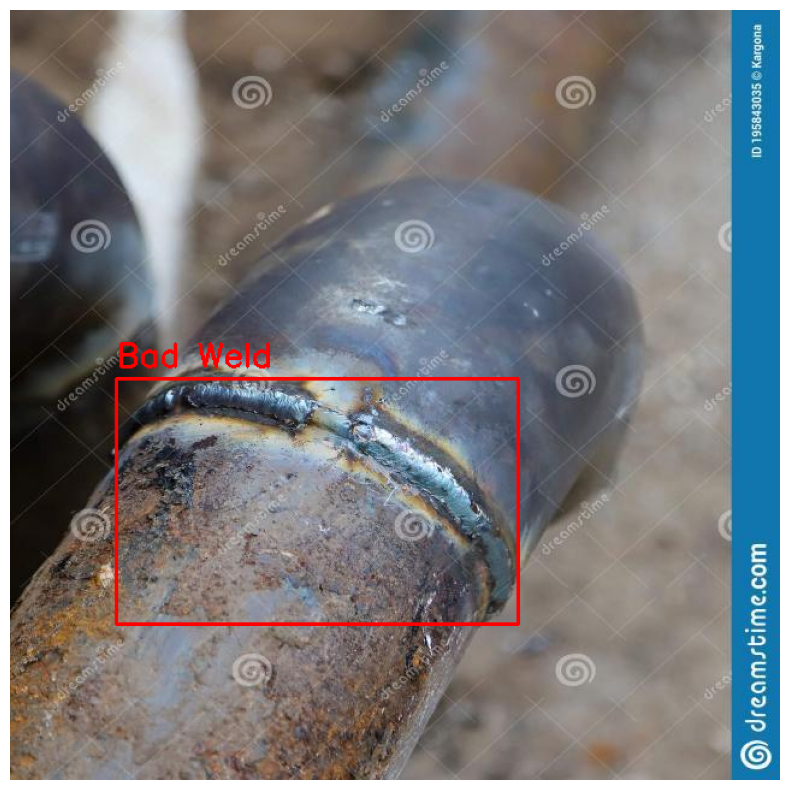

In [ ]:
visualize_random_train_image_with_bboxes('/content/drive/MyDrive/welding dataset/The Welding Defect Dataset')

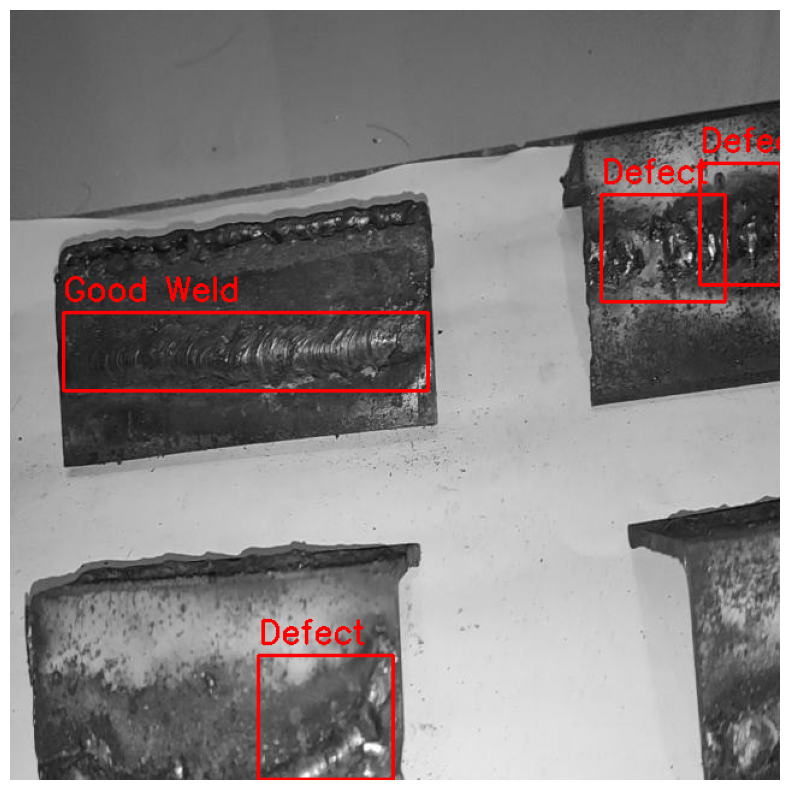

In [ ]:
visualize_random_train_image_with_bboxes('/content/drive/MyDrive/welding dataset/The Welding Defect Dataset')

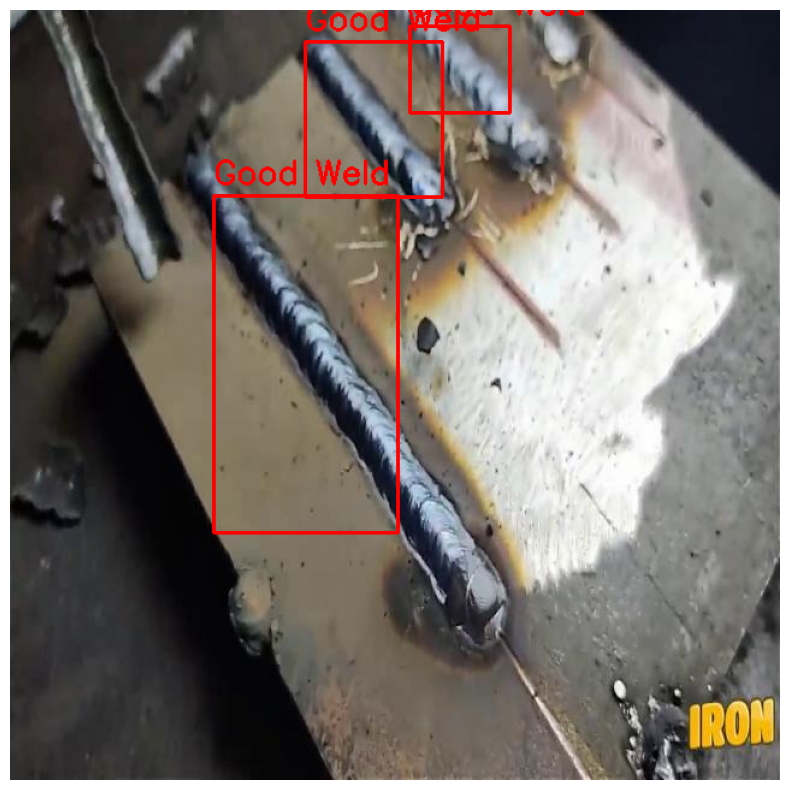

In [ ]:
visualize_random_train_image_with_bboxes('/content/drive/MyDrive/welding dataset/The Welding Defect Dataset')

In [ ]:

image_path = '/content/drive/MyDrive/welding dataset/The Welding Defect Dataset/train/images/19cacbd9-61c6b81f-c5_jpg.rf.443cbb0b638fbadbf1a8ac60d4a5415a.jpg'

img = cv2.imread(image_path)

height, width, channels = img.shape

print(f"Image size: {width} x {height}")

Image size: 640 x 640


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 13.8 MB/s eta 0:00:00


In [ ]:
yaml_content = """
train: /content/drive/MyDrive/welding dataset/The Welding Defect Dataset/train/images
val:   /content/drive/MyDrive/welding dataset/The Welding Defect Dataset/valid/images
test:  /content/drive/MyDrive/welding dataset/The Welding Defect Dataset/test/images
nc: 3
names: ['Bad Weld', 'Good Weld', 'Defect']
"""

yaml_file_path = '/content/drive/MyDrive/welding dataset/The Welding Defect Dataset/data.yaml'

with open(yaml_file_path, 'w') as file:
    file.write(yaml_content)


In [ ]:
model.train(data='/content/drive/MyDrive/welding dataset/The Welding Defect Dataset/data.yaml', epochs=5, imgsz=160)

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/welding dataset/The Welding Defect Dataset/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=160, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

100%|██████████| 755k/755k [00:00<00:00, 3.45MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/welding dataset/The Welding Defect Dataset/train/labels.cache... 839 images, 0 backgrounds, 0 corrupt: 100%|██████████| 839/839 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/welding dataset/The Welding Defect Dataset/valid/labels.cache... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 160 train, 160 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      2.846      3.612      1.621         35        160: 100%|██████████| 53/53 [01:25<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [02:17<00:00, 22.93s/it]

                   all        176        573       0.52     0.0502      0.116     0.0425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      2.304      2.491      1.324         26        160: 100%|██████████| 53/53 [01:02<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.32s/it]

                   all        176        573       0.22      0.341      0.164     0.0602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      2.216      2.168      1.288         54        160: 100%|██████████| 53/53 [01:00<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.10s/it]

                   all        176        573       0.28      0.371        0.2     0.0821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G       2.13      2.052      1.266         38        160: 100%|██████████| 53/53 [00:59<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.30s/it]

                   all        176        573      0.372      0.453      0.225     0.0982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      2.016      1.938      1.217         45        160: 100%|██████████| 53/53 [01:00<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.26s/it]

                   all        176        573      0.404      0.403      0.295      0.138



5 epochs completed in 0.140 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.48s/it]


                   all        176        573      0.409      0.402      0.294      0.138
              Bad Weld         87        127      0.346      0.622      0.326       0.16
             Good Weld        119        253      0.451      0.573      0.497      0.232
                Defect         90        193      0.432     0.0104      0.058     0.0228
Speed: 0.2ms preprocess, 31.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79a060bd57b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04


image 1/1 /content/drive/MyDrive/welding dataset/The Welding Defect Dataset/test/images/Good-Welding-images_17_jpeg_jpg.rf.be58c70a9f7f542fc89cb48847776741.jpg: 640x640 (no detections), 261.5ms
Speed: 3.2ms preprocess, 261.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


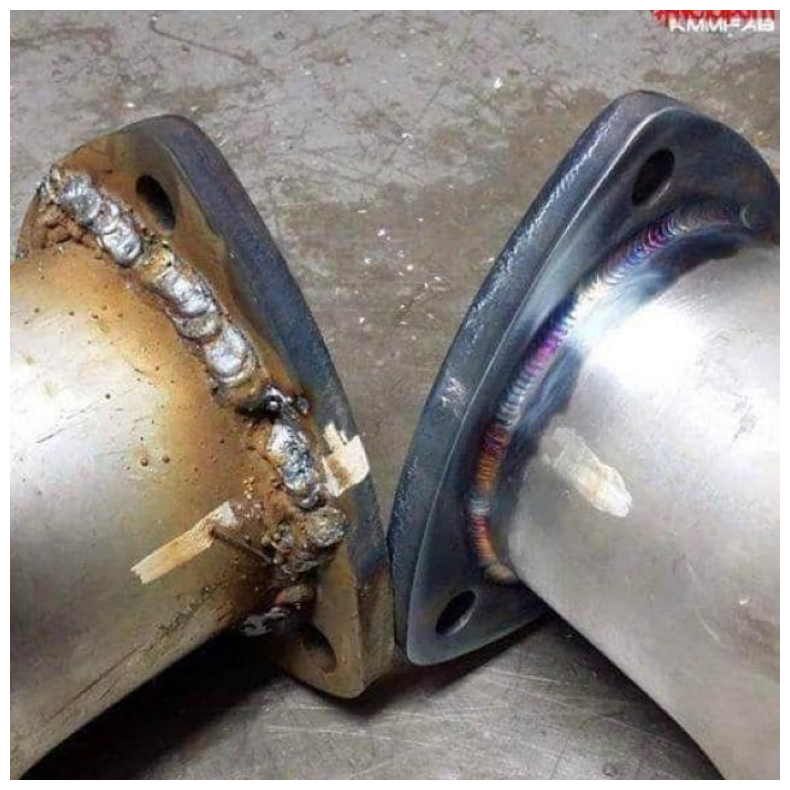

In [ ]:
test_image_path = '/content/drive/MyDrive/welding dataset/The Welding Defect Dataset/test/images/Good-Welding-images_17_jpeg_jpg.rf.be58c70a9f7f542fc89cb48847776741.jpg'

results = model(test_image_path)


boxes = results[0].boxes
classes = results[0].names
class_ids = boxes.cls.tolist()

img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img)

for box in boxes:

    x1, y1, x2, y2 = map(int, box.xyxy[0])

    class_id = int(box.cls[0])

    class_name = classes[class_id]

    plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='red', linewidth=2))
    plt.text(x1, y1, class_name, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')
plt.show()

for i, class_id in enumerate(class_ids):
    print(f"Predicted class {i+1}: {classes[int(class_id)]}")


In [ ]:
from ultralytics import YOLO

In [ ]:
def preprocess_image(image_path, input_size=(160, 160)):
    # Read the image
    img = cv2.imread(image_path)

    img = cv2.resize(img, input_size)


    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img = img.astype(np.float32) / 255.0

    img = img.transpose(2, 0, 1)

    img = np.expand_dims(img, axis=0)

    return img

In [ ]:
!pip install opencv-python

import cv2
import numpy as np

def preprocess_image(image_path, input_size=(160, 160)):
    """
    Preprocesses an image for inference.

    Args:
        image_path (str): Path to the image file.
        input_size (tuple): Desired size of the output image (height, width).

    Returns:
        np.ndarray: Preprocessed image.
    """

    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Could not read image from {image_path}. Please check the path.")
        return None


    img = cv2.resize(img, input_size)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img = img.astype(np.float32) / 255.0

    img = img.transpose(2, 0, 1)

    img = np.expand_dims(img, axis=0)

    return img

image_path = '/content/drive/MyDrive/welding dataset/The Welding Defect Dataset/test/images/SampleV2_2_mp4-98_jpg.rf.83b6e5f3fa68582da8fe9db065a00a98.jpg'
preprocessed_image = preprocess_image(image_path)

if preprocessed_image is not None:
    print("Preprocessed image shape:", preprocessed_image.shape)
else:
    print("Image preprocessing failed.")

Preprocessed image shape: (1, 3, 160, 160)
